In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph

AMOSTAS = 2000

np.random.seed(2)

circulos,_ = datasets.make_circles(n_samples=AMOSTAS, factor = .4,noise=.07)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTAS, random_state=15)

aleatorio = np.random.rand(AMOSTAS, 2)

X_aux, y_aux = datasets.make_blobs(n_samples=AMOSTAS, random_state=42)
transf = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X_aux, transf)

In [4]:
def cria_grafico(X, y_pred = None, centroid = None):
    """
    Cria um gráfico que pode ou não conter clusters separados por cores, bem como seus centroides.
    Args:
        * X - np.array: dados em 2 dimensões contendo duas features de interesse.
        * y_pred - np.array: dados em 1 dimensão indicando a classe das observações de X.
        * centroid - np.array ou list: centroides dos clusters.
    """
    
    plt.scatter(X[:, 0], X[:, 1], s=10 ,c = y_pred) 
    
    if(centroid is not None):
        # adiciona os centroides no grafico
        plt.scatter(centroid[:,0],centroid[:,1],s=40,c =['#ff0000'],label = 'Centroides')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plt.legend()
    
    plt.show()

C:\Users\mari_\AppData\Local\Temp\ipykernel_11700\3226070787.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


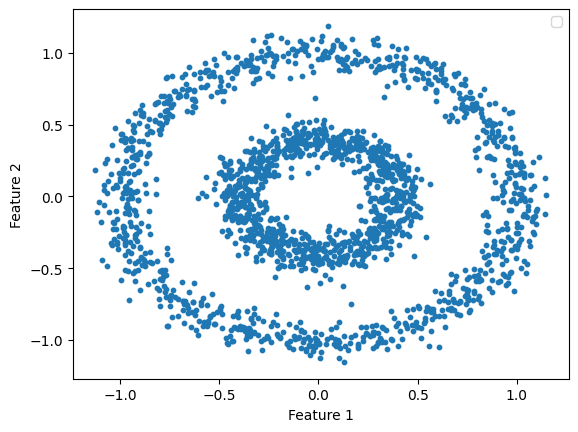

In [5]:
cria_grafico(circulos)

In [ ]:
from pyclustering.cluster.hopkins import hopkins

H_circulos = hopkins(circulos.tolist(), AMOSTAS)

H_circulos

C:\Users\mari_\AppData\Local\Temp\ipykernel_11700\3226070787.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


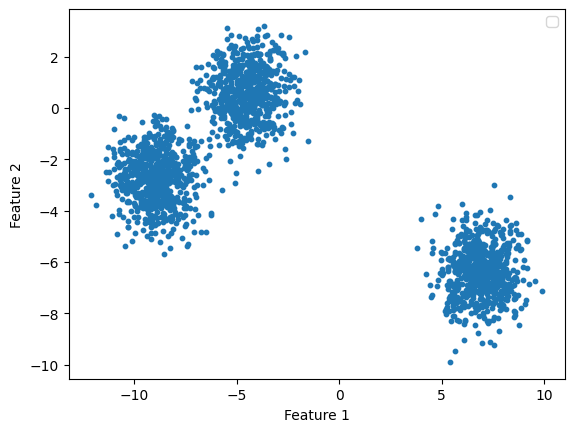

In [10]:
cria_grafico(bolinhas)

C:\Users\mari_\AppData\Local\Temp\ipykernel_11700\3226070787.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


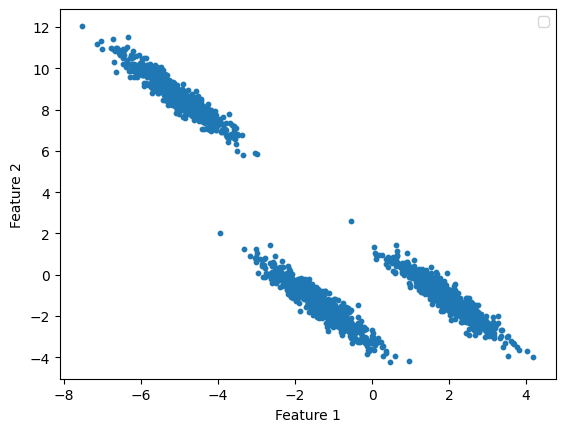

In [11]:
cria_grafico(aniso)

C:\Users\mari_\AppData\Local\Temp\ipykernel_11700\3226070787.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


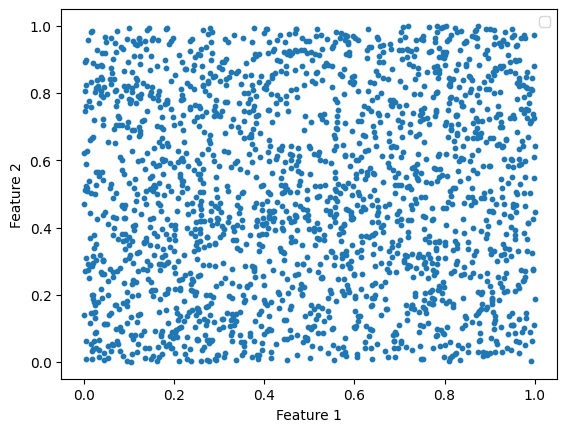

In [12]:
cria_grafico(aleatorio)

c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\13.kmeans\estudo\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\13.kmeans\estudo\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


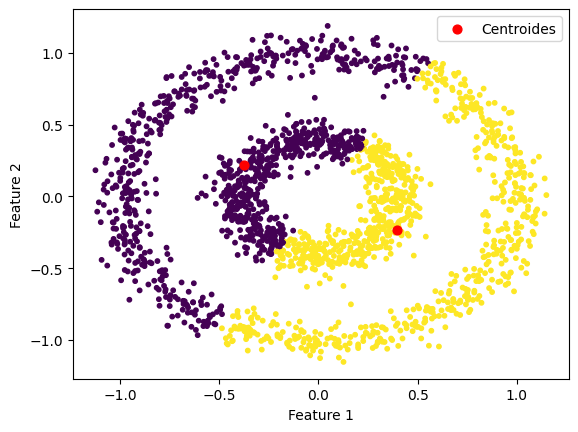

In [13]:
centroid, label, inertia = cluster.k_means(circulos, n_clusters = 2) 
cria_grafico(circulos, label, centroid)

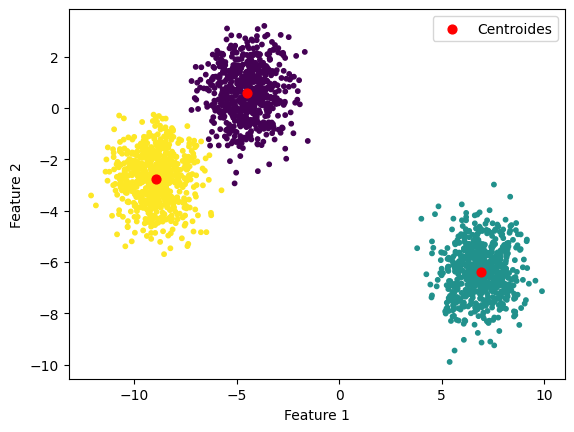

In [14]:
centroid, label, inertia = cluster.k_means(bolinhas, n_clusters = 3) 
cria_grafico(bolinhas, label, centroid)

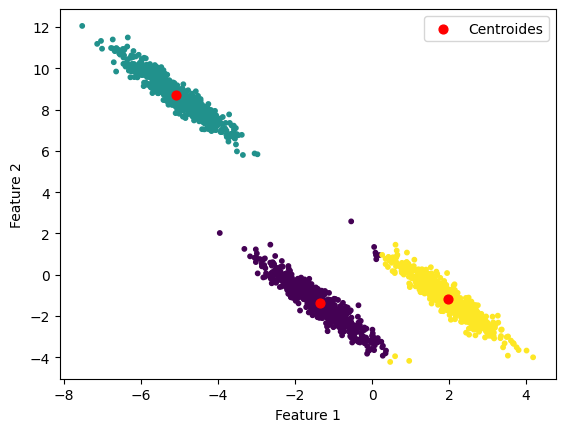

In [15]:
centroid, label, inertia = cluster.k_means(aniso, n_clusters = 3) 
cria_grafico(aniso, label, centroid)

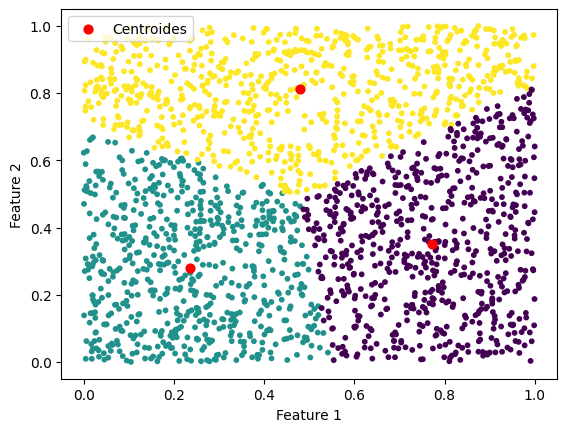

In [16]:
centroid, label, inertia = cluster.k_means(aleatorio, n_clusters = 3) 
cria_grafico(aleatorio, label, centroid)

In [17]:
def k_means_elbow(dados,max_clust = 10):
    '''
    Executa o algoritmo k-means k vezes e plota o gráfico do cotovelo.
    Args:
        * dados - np.array: dados em 2 dimensões contendo duas features de interesse.
        * max_clust - integer: numero de clusters para criar o gráfico de cotovelo. 
    '''
    sse = {}
    
    for n_clust in range(1,max_clust):
        
        km = cluster.KMeans(n_clusters = n_clust).fit(dados)
        
        sse[n_clust] = km.inertia_
    
    
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('Numero de Clusters')
    plt.ylabel('SSE')
    plt.title('Metodo do Cotovelo K-Means')
    plt.show()

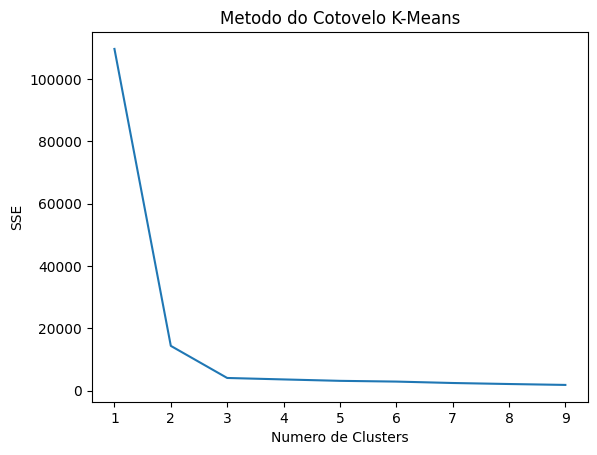

In [18]:
k_means_elbow(bolinhas)

C:\Users\mari_\AppData\Local\Temp\ipykernel_11700\3226070787.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


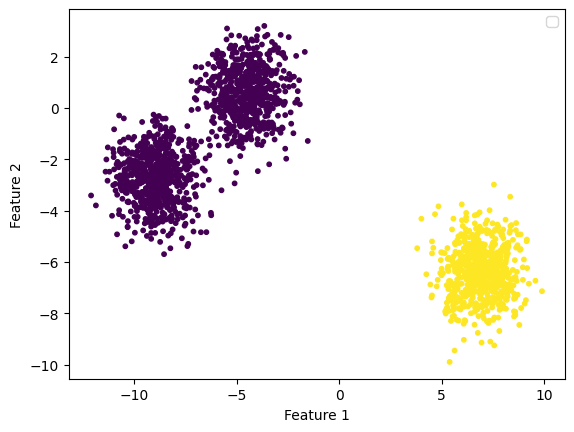

In [20]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2)

y1 = kmeans1.fit_predict(bolinhas)

cria_grafico(bolinhas, y1)

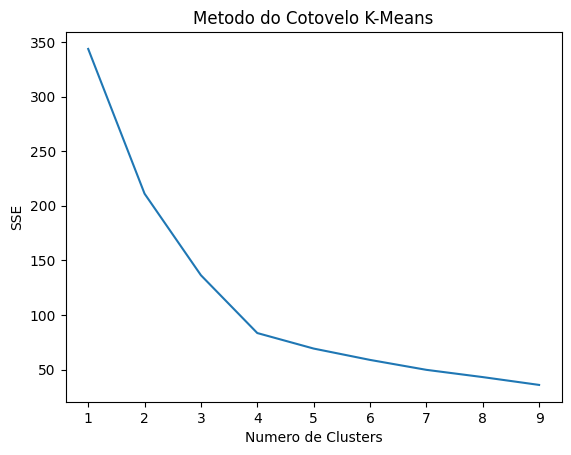

In [21]:
k_means_elbow(aleatorio)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

# baixa a imagem em formato de um array
china = load_sample_image("china.jpg")


In [23]:
type(china)

numpy.ndarray

In [25]:
china.shape

(427, 640, 3)

In [27]:
china.max()

np.uint8(255)

In [28]:
china.min()

np.uint8(0)

In [29]:
china = np.array(china, dtype=np.float64) / 255

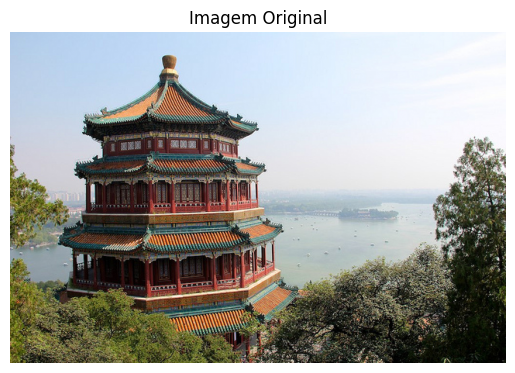

In [30]:
plt.imshow(china)
plt.title("Imagem Original")
plt.axis('off')
plt.show()

In [31]:
# repare que estamos mudando o formato da imagem para ser uma matriz com um número de linhas igual a altura * largura e 3 colunas
image_array = np.reshape(china, (china.shape[0] * china.shape[1], china.shape[2]))

In [33]:
image_array.shape

(273280, 3)

In [34]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)

In [35]:
image_array_sample.shape

(1000, 3)

In [36]:
kmeans2 = KMeans(n_clusters=64, random_state=0)

kmeans2.fit(image_array_sample)

KMeans(n_clusters=64, random_state=0)

In [37]:
labels = kmeans2.predict(image_array)

In [38]:
labels.shape

(273280,)

In [40]:
labels.max()

np.int32(63)

In [41]:
labels.min()

np.int32(0)

In [42]:
#Obs: kmeans deve ser o nome da variável onde você definiu seu modelo kmeans!
centroides_pixels = kmeans2.cluster_centers_[labels]

In [43]:
centroides_pixels.shape

(273280, 3)

In [48]:
teste = centroides_pixels.reshape(427, 640, 3)

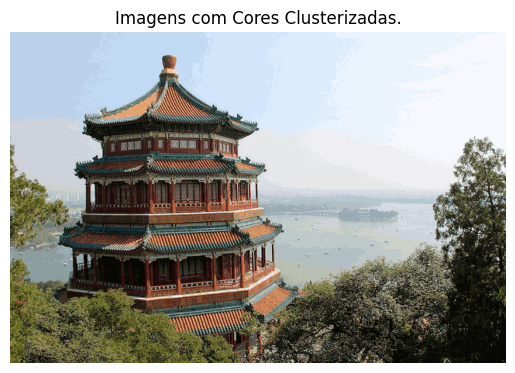

In [49]:
plt.imshow(teste)
plt.title(f'Imagens com Cores Clusterizadas.')
plt.axis('off')
plt.show()

In [46]:
img_clusterizada = centroides_pixels.reshape(china.shape[0], china.shape[1], china.shape[2])

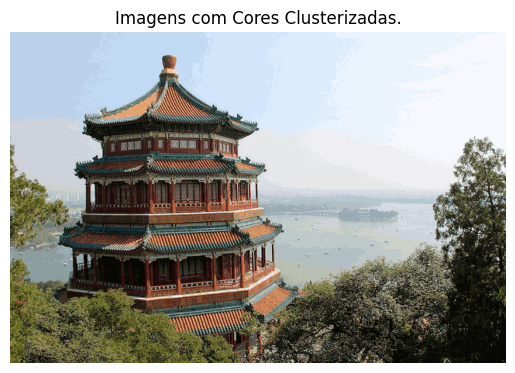

In [47]:
plt.imshow(img_clusterizada)
plt.title(f'Imagens com Cores Clusterizadas.')
plt.axis('off')
plt.show()